<a href="https://colab.research.google.com/github/JakubSzwajka/google_colab_test/blob/main/wsb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importowanie pełnej Tabeli przygotowanej w Excelu

In [ ]:
from google.colab import files
import pandas as pd

dtf = pd.read_excel("pr.xlsx")
print(dtf)

      MANDT       BANFN  BNFPO BSART  ... OIO_REF_BNFPO  OIO_HOLD ZZCHA ZZCHAP
0        10      800490     10   ZSR  ...             0       NaN     0      0
1        10      800522     10   ZSR  ...             0       NaN     0      0
2        10      800551      1   ZSR  ...             0       NaN     0      0
3        10      800551      2   ZSR  ...             0       NaN     0      0
4        10      800551      3   ZSR  ...             0       NaN     0      0
...     ...         ...    ...   ...  ...           ...       ...   ...    ...
1198     10  5000002318     10  ZMRP  ...             0       NaN     0      0
1199     10  5000002319     10  ZMRP  ...             0       NaN     0      0
1200     10  5000002319     20  ZMRP  ...             0       NaN     0      0
1201     10  5000002330     10  ZMRP  ...             0       NaN     0      0
1202     10  5000002332     10  ZMRP  ...             0       NaN     0      0

[1203 rows x 168 columns]


1. Usunięcie niepotrzebnych kolumn o których już wiem że ich nie potrzebuje. 
2. Usunięcie kolumn które nie są wypełnione danymi przynajmniej w połowie. 

In [ ]:
columns_to_remove = ['MANDT', 'FRGZU', 'ADRNR', 'ADRN2', 'BANFN']

def removeColumnsByName(dtf: pd.DataFrame, namesList: list):
    dtf = dtf.drop(columns=namesList)
    dtf = dtf.dropna(axis=1, how='any', thresh=dtf.shape[0]/2)
    return dtf

dtf = removeColumnsByName( dtf , columns_to_remove)
print(dtf)

      BNFPO BSART BSTYP STATU  ... OIOILCON OIO_REF_BNFPO ZZCHA ZZCHAP
0        10   ZSR     B     N  ...        0             0     0      0
1        10   ZSR     B     B  ...        0             0     0      0
2         1   ZSR     B     B  ...        0             0     0      0
3         2   ZSR     B     B  ...        0             0     0      0
4         3   ZSR     B     B  ...        0             0     0      0
...     ...   ...   ...   ...  ...      ...           ...   ...    ...
1198     10  ZMRP     B     N  ...        0             0     0      0
1199     10  ZMRP     B     B  ...        0             0     0      0
1200     20  ZMRP     B     B  ...        0             0     0      0
1201     10  ZMRP     B     N  ...        0             0     0      0
1202     10  ZMRP     B     N  ...        0             0     0      0

[1203 rows x 64 columns]


Przemapowanie wartości '05' i '08' w polu "BANPR" na 0 i 1

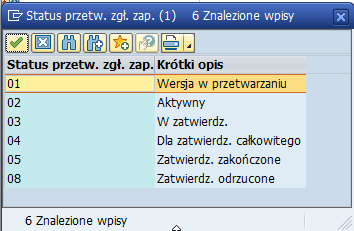

In [ ]:
dtf["BANPR"] = dtf["BANPR"].map({5:1, 8:0})
print(dtf["BANPR"])

0       0
1       1
2       1
3       0
4       0
       ..
1198    0
1199    1
1200    0
1201    0
1202    1
Name: BANPR, Length: 1203, dtype: int64


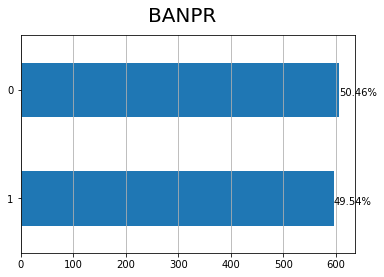

In [ ]:
import matplotlib.pyplot as plt

def plotUnivariateDistribution(dtf, y):
    ax = dtf[y].value_counts().sort_values().plot(kind="barh")
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    for i in ax.patches:
        ax.text(i.get_width() + .3, i.get_y() + .20,
                str(round((i.get_width() / total) * 100, 2)) + '%',
                fontsize=10, color='black')
    ax.grid(axis="x")
    plt.suptitle(y, fontsize=20)
    plt.show()

plotUnivariateDistribution( dtf, "BANPR")

In [ ]:
# dtf = dtf.set_index("BANFN")
dtf = dtf.rename(columns={"BANPR": "Y"})

X = dtf.columns
print(X)

Index(['BNFPO', 'BSART', 'BSTYP', 'STATU', 'ESTKZ', 'FRGKZ', 'FRGST', 'EKGRP',
       'ERDAT', 'TXZ01', 'WERKS', 'MATKL', 'MENGE', 'MEINS', 'BUMNG', 'BADAT',
       'LPEIN', 'LFDAT', 'FRGDT', 'WEBAZ', 'PREIS', 'PEINH', 'PSTYP', 'KNTTP',
       'KZVBR', 'WEPOS', 'REPOS', 'KTPNR', 'QUPOS', 'BATOL', 'BVDRK', 'EBELP',
       'BSMNG', 'XOBLR', 'RSNUM', 'ARSNR', 'ARSPS', 'PACKNO', 'CUOBJ', 'FRGGR',
       'MNG02', 'WAERS', 'GSFRG', 'SPRAS', 'FORDP', 'PLIFZ', 'UZEIT', 'Y',
       'RLWRT', 'EPREFITM', 'GMMNG', 'KBLPOS', 'PRIO_URG', 'PRIO_REQ', 'ANZSN',
       'MHDRZ', 'SRM_CONTRACT_ITM', 'ZZREQPO', 'BNFPO_CS', 'BSMNG_SND',
       'OIOILCON', 'OIO_REF_BNFPO', 'ZZCHA', 'ZZCHAP'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
# print(dtf)

# X = dtf.columns.tolist()
y = dtf.filter(['Y'])
# print(y)
# print(dtf.columns)
X = dtf.drop(columns=['Y'])
# print(X)
# print(dtf)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)
print(X_train)
print(y_train)

      BNFPO BSART BSTYP STATU  ... OIOILCON OIO_REF_BNFPO ZZCHA ZZCHAP
975      17    IN     B     N  ...        0             0     0      0
305      10    IN     B     N  ...        0             0     0      0
597      10    IN     B     B  ...        0             0     0      0
910      10    IN     B     N  ...        0             0     0      0
641      10    IN     B     N  ...        0             0     0      0
...     ...   ...   ...   ...  ...      ...           ...   ...    ...
586      10    IN     B     N  ...        0             0     0      0
585      20    IN     B     N  ...        0             0     0      0
1053      8    IN     B     N  ...        0             0     0      0
550      10    IN     B     N  ...        0             0     0      0
254      10    IN     B     N  ...        0             0     0      0

[793 rows x 63 columns]
      Y
975   1
305   0
597   0
910   1
641   1
...  ..
586   1
585   0
1053  0
550   1
254   1

[793 rows x 1 columns]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'IN'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'IN'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'IN'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t